In [1]:
import sys
sys.path.append('../')

In [32]:
### Libraries
from pipelines.experimental_modeling_pipeline import DiabetesPreprocessing as DP
from pipelines.experimental_modeling_pipeline import AsthmaPreprocessing as AP
from pipelines.experimental_modeling_pipeline import ClusteringAnalysis as QA
from pipelines.experimental_modeling_pipeline import Experimental_modeling_pipeline as EMP
from pipelines.experimental_modeling_pipeline import CopdPreprocessing as COPDP
from pipelines.experimental_modeling_pipeline import ObesityPreprocessing as OP
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
from scipy import stats

dp = DP("C:/Users/keimp/")
ap = AP("C:/Users/keimp/")
copdp = COPDP("C:/Users/keimp/")
op = OP("C:/Users/keimp/")
emp = EMP()

In [64]:
df = pd.read_csv("C:/Users/keimp/NHS/Data_files/Labeling/osteoporosis_diagnosis_dates.csv")

In [65]:
df.shape

(502364, 4)

In [66]:
df.head()

,Participant ID,Date M80 first reported (osteoporosis with pathological fracture),Date M81 first reported (osteoporosis without pathological fracture),Date M82 first reported (osteoporosis in diseases classified elsewhere)
0,1078283,NaN,NaN,NaN
1,5170903,NaN,NaN,NaN
2,5723318,NaN,NaN,NaN
3,2903197,NaN,NaN,NaN
4,5732491,NaN,NaN,NaN


In [67]:
df["Date M80 first reported (osteoporosis with pathological fracture)"].dropna().shape

(2742,)

In [68]:
df["Date M81 first reported (osteoporosis without pathological fracture)"].dropna().shape

(26849,)

In [69]:
df["Date M82 first reported (osteoporosis in diseases classified elsewhere)"].dropna().shape

(202,)

In [70]:
df["Date M80 first reported (osteoporosis with pathological fracture)_binary"] = df["Date M80 first reported (osteoporosis with pathological fracture)"].apply(dp.nan_to_binary)
df["Date M81 first reported (osteoporosis without pathological fracture)_binary"] = df["Date M81 first reported (osteoporosis without pathological fracture)"].apply(dp.nan_to_binary)
df["Date M82 first reported (osteoporosis in diseases classified elsewhere)_binary"] = df["Date M82 first reported (osteoporosis in diseases classified elsewhere)"].apply(dp.nan_to_binary)

### BBM

In [71]:
df = df.merge(pd.read_csv("C:/Users/keimp/NHS/Data_files/Grouped_files/replace/Blood_biomarkers.csv"), on="Participant ID")

In [72]:
c = [
 'Haemoglobin concentration | Instance 0',

 'Albumin | Instance 0',

 'Creatinine | Instance 0',

 'C-reactive protein | Instance 0',

 'Cholesterol | Instance 0',

 'HDL cholesterol | Instance 0',

 'LDL direct | Instance 0',

 'Glucose | Instance 0',

 'Triglycerides | Instance 0',

 'Vitamin D | Instance 0',

 'Glycated haemoglobin (HbA1c) | Instance 0',

 'Alanine aminotransferase | Instance 0',

 'Alkaline phosphatase | Instance 0',

 'Apolipoprotein A | Instance 0',

 'Apolipoprotein B | Instance 0',

 'Aspartate aminotransferase | Instance 0',

 'Calcium | Instance 0',

 'Direct bilirubin | Instance 0',

 'Gamma glutamyltransferase | Instance 0',

 'IGF-1 | Instance 0',

 'Lipoprotein A | Instance 0',
 
 'Rheumatoid factor | Instance 0',
 
 'Phosphate | Instance 0']

In [73]:
#visualization function
def boxplot_timseries(data, title, abline=False):
    fig = plt.figure()
     
    # Creating axes instance
    ax = fig.add_axes([0, 0, 1, 1])
    ax.set_title(title)
    
    # Creating plot
    bp = ax.boxplot(data)
    #plt.xticks([1, 2], ['df1', 'df2'])
    if abline != False:
        plt.axvline(x = abline, color = 'b')
    
    plt.show()

Haemoglobin concentration | Instance 0
(25314, 2) (452727, 2)
TtestResult(statistic=array([         inf, -69.55159198]), pvalue=array([0., 0.]), df=array([478039., 478039.]))


c:\users\keimp\appdata\local\programs\python\python39\lib\site-packages\scipy\stats\_axis_nan_policy.py:551: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, axis=axis, **kwds)


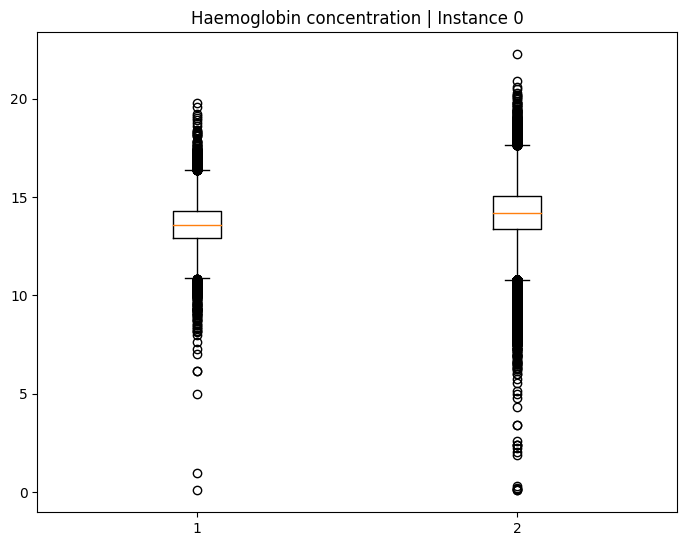

Albumin | Instance 0
(22698, 2) (407262, 2)
TtestResult(statistic=array([         inf, -30.35132017]), pvalue=array([0.0000000e+000, 3.9548843e-202]), df=array([429958., 429958.]))


c:\users\keimp\appdata\local\programs\python\python39\lib\site-packages\scipy\stats\_axis_nan_policy.py:551: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, axis=axis, **kwds)


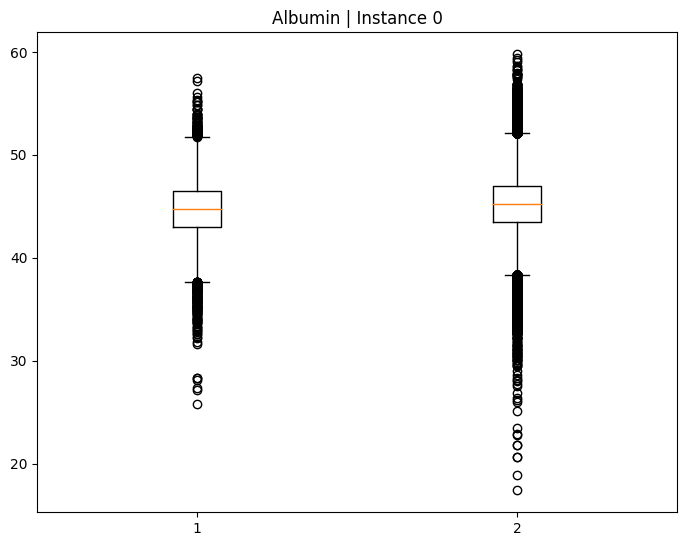

c:\users\keimp\appdata\local\programs\python\python39\lib\site-packages\scipy\stats\_axis_nan_policy.py:551: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, axis=axis, **kwds)


Creatinine | Instance 0
(24880, 2) (444350, 2)
TtestResult(statistic=array([         inf, -48.02783802]), pvalue=array([0., 0.]), df=array([469228., 469228.]))


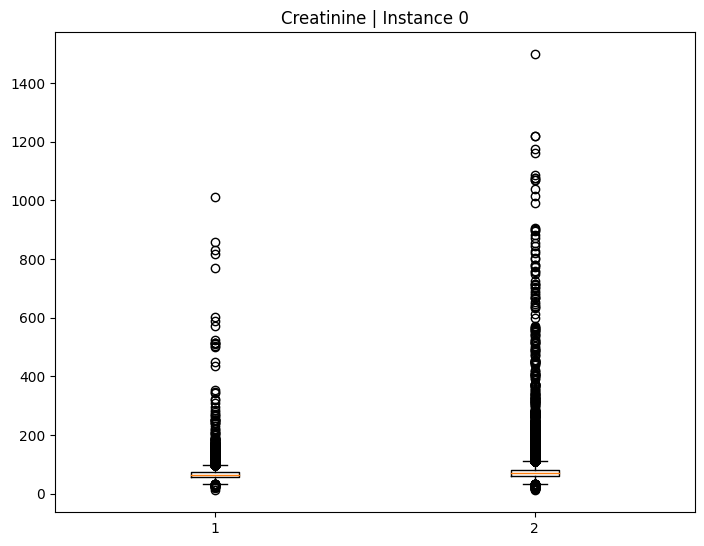

C-reactive protein | Instance 0
(24837, 2) (443604, 2)
TtestResult(statistic=array([        inf, 16.24453319]), pvalue=array([0.00000000e+00, 2.53506616e-59]), df=array([468439., 468439.]))


c:\users\keimp\appdata\local\programs\python\python39\lib\site-packages\scipy\stats\_axis_nan_policy.py:551: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, axis=axis, **kwds)


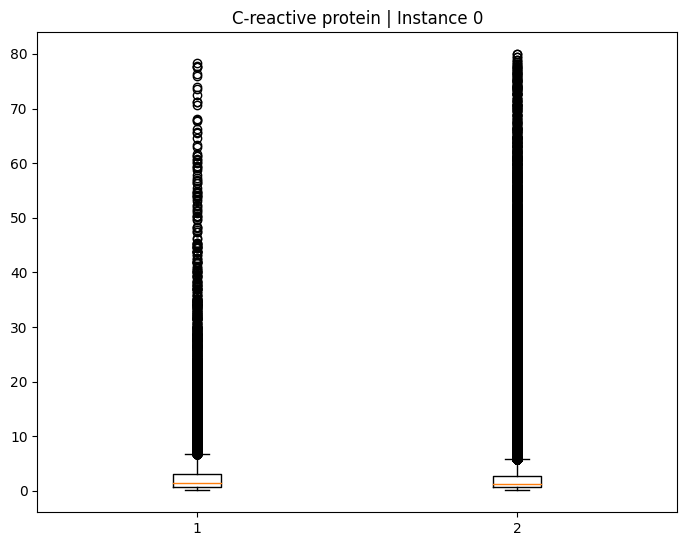

Cholesterol | Instance 0
(24884, 2) (444578, 2)
TtestResult(statistic=array([        inf, 19.92528083]), pvalue=array([0.00000000e+00, 2.67275359e-88]), df=array([469460., 469460.]))


c:\users\keimp\appdata\local\programs\python\python39\lib\site-packages\scipy\stats\_axis_nan_policy.py:551: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, axis=axis, **kwds)


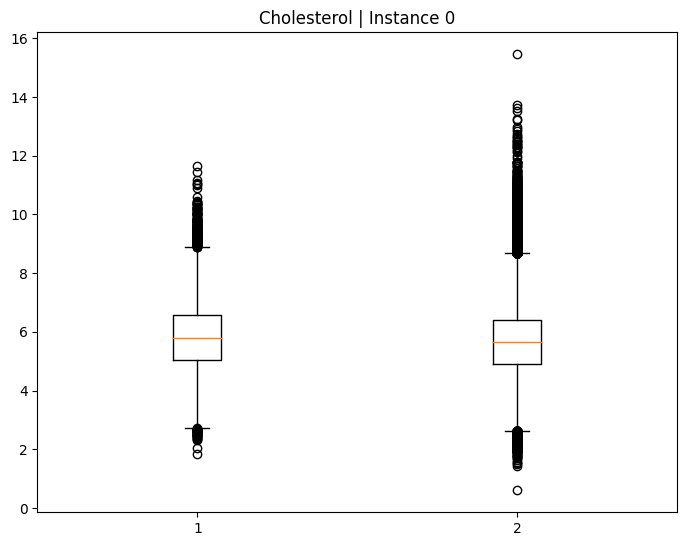

HDL cholesterol | Instance 0
(22689, 2) (407067, 2)
TtestResult(statistic=array([        inf, 59.34353254]), pvalue=array([0., 0.]), df=array([429754., 429754.]))


c:\users\keimp\appdata\local\programs\python\python39\lib\site-packages\scipy\stats\_axis_nan_policy.py:551: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, axis=axis, **kwds)


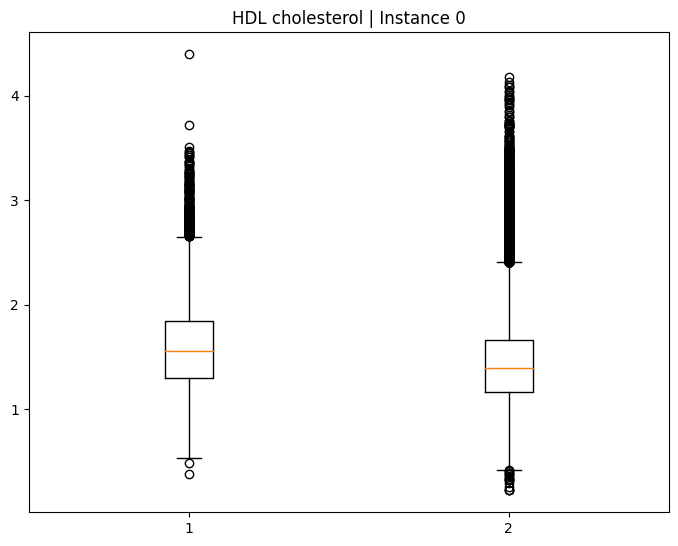

c:\users\keimp\appdata\local\programs\python\python39\lib\site-packages\scipy\stats\_axis_nan_policy.py:551: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, axis=axis, **kwds)


LDL direct | Instance 0
(24837, 2) (443742, 2)
TtestResult(statistic=array([       inf, 4.35274319]), pvalue=array([0.00000000e+00, 1.34473023e-05]), df=array([468577., 468577.]))


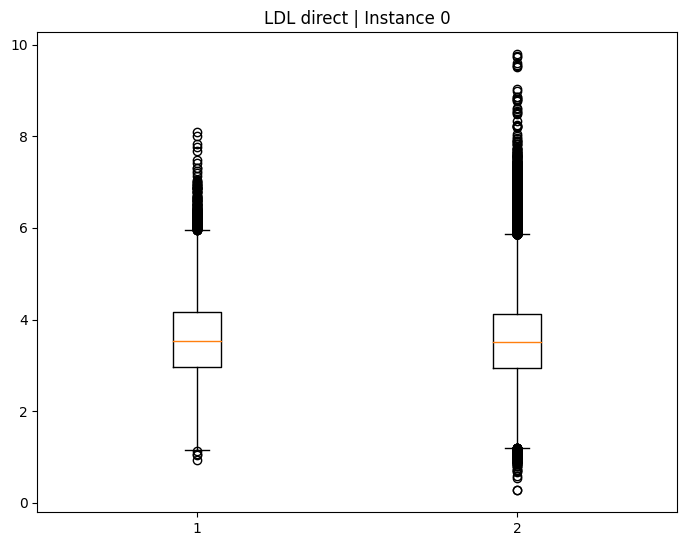

c:\users\keimp\appdata\local\programs\python\python39\lib\site-packages\scipy\stats\_axis_nan_policy.py:551: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, axis=axis, **kwds)


Glucose | Instance 0
(22669, 2) (406783, 2)
TtestResult(statistic=array([       inf, 1.15607869]), pvalue=array([0.        , 0.24764962]), df=array([429450., 429450.]))


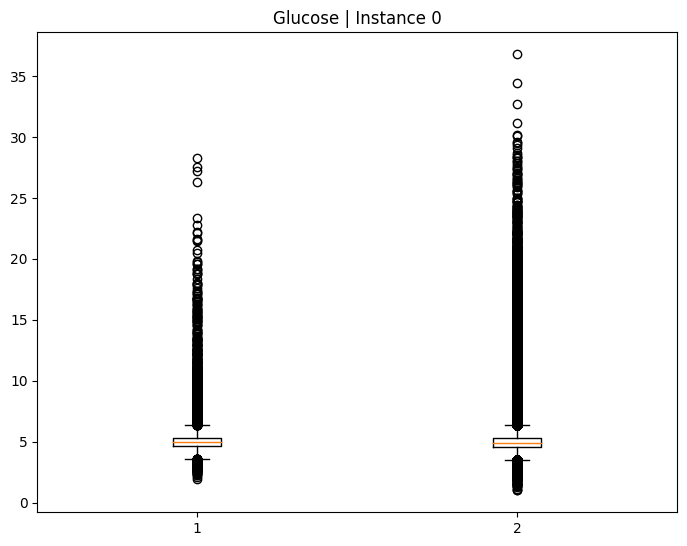

Triglycerides | Instance 0
(24865, 2) (444222, 2)
TtestResult(statistic=array([         inf, -21.49551928]), pvalue=array([0.00000000e+000, 1.92209778e-102]), df=array([469085., 469085.]))


c:\users\keimp\appdata\local\programs\python\python39\lib\site-packages\scipy\stats\_axis_nan_policy.py:551: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, axis=axis, **kwds)


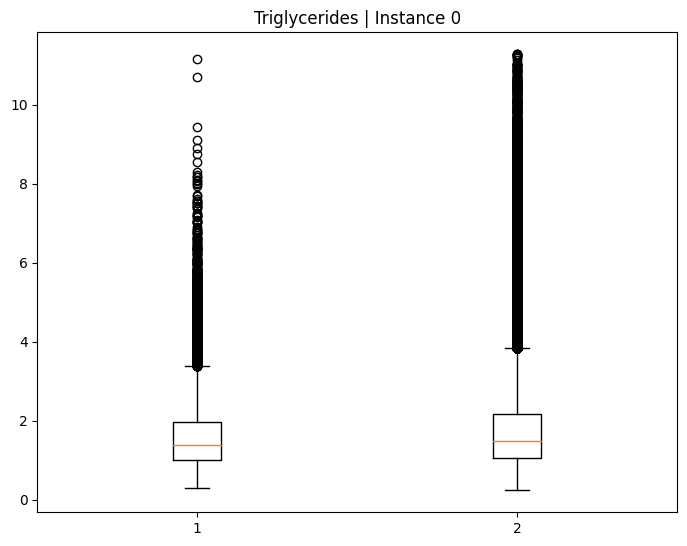

Vitamin D | Instance 0
(23473, 2) (424756, 2)
TtestResult(statistic=array([        inf, 31.10584031]), pvalue=array([0.00000000e+000, 3.38605686e-212]), df=array([448227., 448227.]))


c:\users\keimp\appdata\local\programs\python\python39\lib\site-packages\scipy\stats\_axis_nan_policy.py:551: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, axis=axis, **kwds)


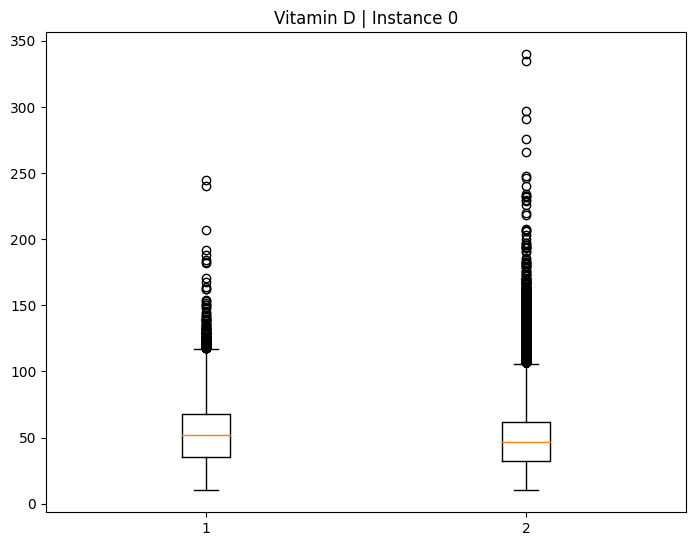

Glycated haemoglobin (HbA1c) | Instance 0
(24854, 2) (441522, 2)
TtestResult(statistic=array([       inf, 8.56579147]), pvalue=array([0.00000000e+00, 1.07654569e-17]), df=array([466374., 466374.]))


c:\users\keimp\appdata\local\programs\python\python39\lib\site-packages\scipy\stats\_axis_nan_policy.py:551: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, axis=axis, **kwds)


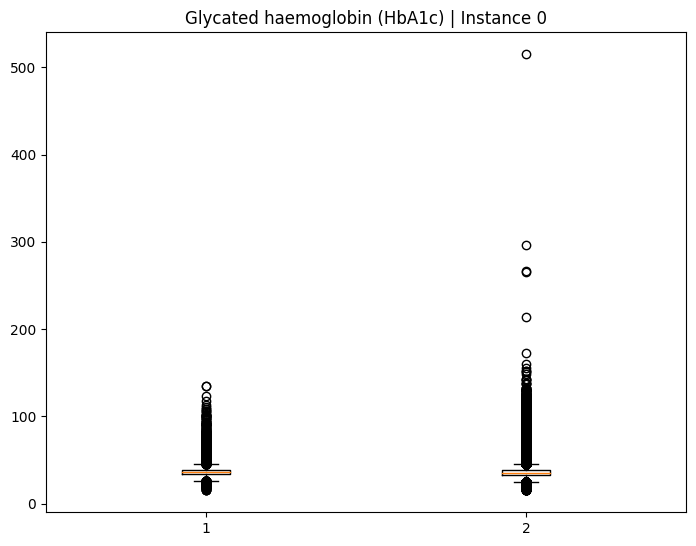

Alanine aminotransferase | Instance 0
(24884, 2) (444390, 2)
TtestResult(statistic=array([         inf, -27.66324259]), pvalue=array([0.00000000e+000, 2.64337923e-168]), df=array([469272., 469272.]))


c:\users\keimp\appdata\local\programs\python\python39\lib\site-packages\scipy\stats\_axis_nan_policy.py:551: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, axis=axis, **kwds)


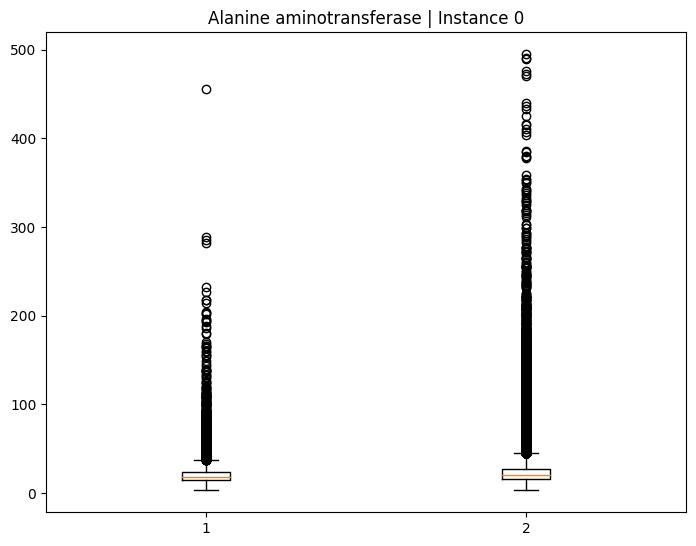

Alkaline phosphatase | Instance 0
(24892, 2) (444583, 2)
TtestResult(statistic=array([        inf, 32.16665428]), pvalue=array([0.00000000e+000, 9.14011572e-227]), df=array([469473., 469473.]))


c:\users\keimp\appdata\local\programs\python\python39\lib\site-packages\scipy\stats\_axis_nan_policy.py:551: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, axis=axis, **kwds)


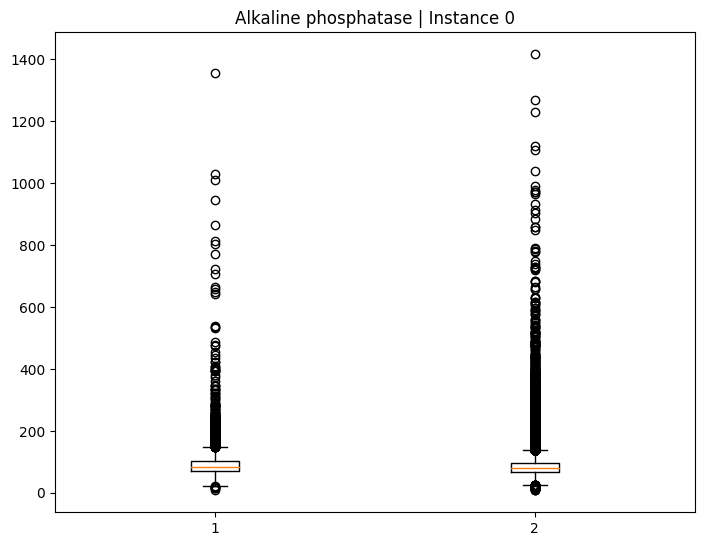

Apolipoprotein A | Instance 0
(22440, 2) (404956, 2)
TtestResult(statistic=array([        inf, 53.99967226]), pvalue=array([0., 0.]), df=array([427394., 427394.]))


c:\users\keimp\appdata\local\programs\python\python39\lib\site-packages\scipy\stats\_axis_nan_policy.py:551: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, axis=axis, **kwds)


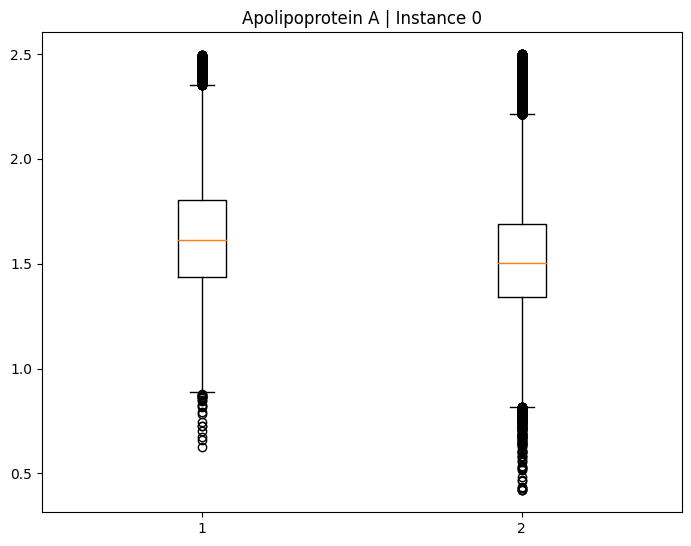

Apolipoprotein B | Instance 0
(24802, 2) (442279, 2)
TtestResult(statistic=array([        inf, -2.07394524]), pvalue=array([0.        , 0.03808494]), df=array([467079., 467079.]))


c:\users\keimp\appdata\local\programs\python\python39\lib\site-packages\scipy\stats\_axis_nan_policy.py:551: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, axis=axis, **kwds)


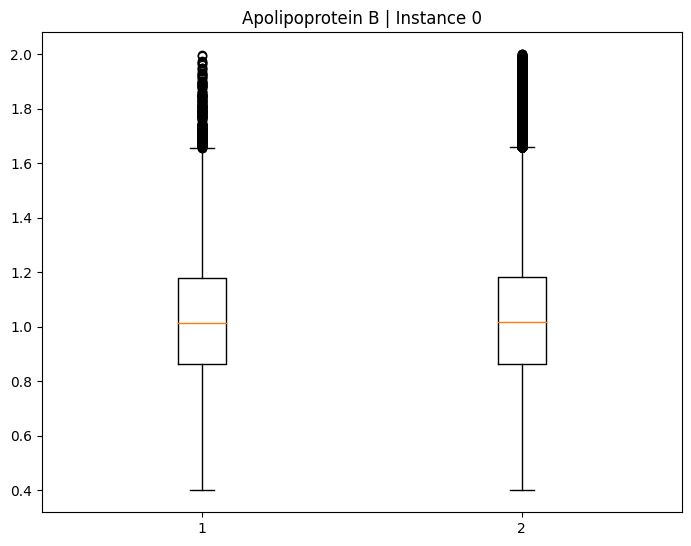

Aspartate aminotransferase | Instance 0
(24795, 2) (442875, 2)
TtestResult(statistic=array([        inf, -1.26652838]), pvalue=array([0.        , 0.20532461]), df=array([467668., 467668.]))


c:\users\keimp\appdata\local\programs\python\python39\lib\site-packages\scipy\stats\_axis_nan_policy.py:551: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, axis=axis, **kwds)


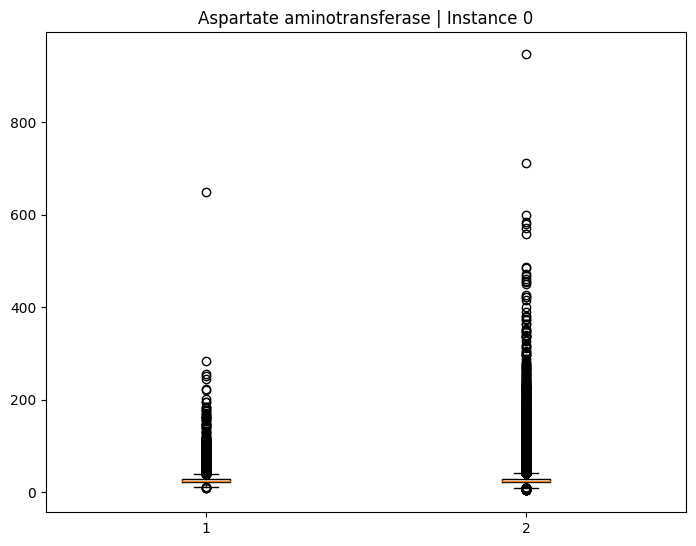

Calcium | Instance 0
(22685, 2) (407132, 2)
TtestResult(statistic=array([        inf, 23.81006077]), pvalue=array([0.0000000e+000, 3.1690044e-125]), df=array([429815., 429815.]))


c:\users\keimp\appdata\local\programs\python\python39\lib\site-packages\scipy\stats\_axis_nan_policy.py:551: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, axis=axis, **kwds)


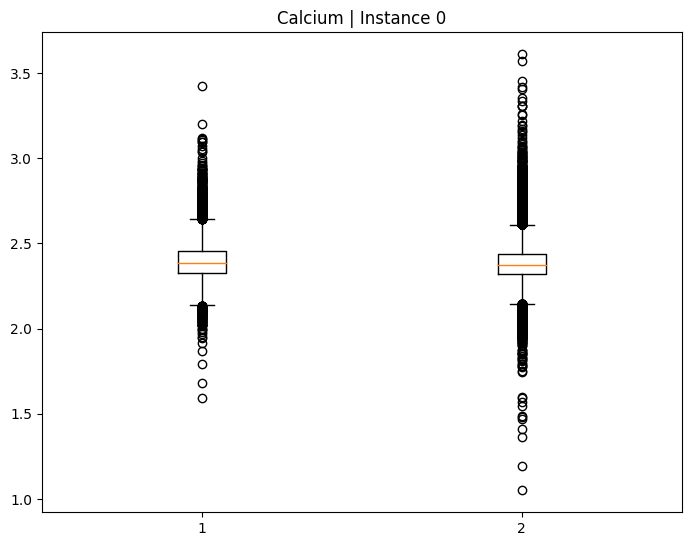

Direct bilirubin | Instance 0
(19775, 2) (378724, 2)
TtestResult(statistic=array([         inf, -22.03827909]), pvalue=array([0.00000000e+000, 1.43560694e-107]), df=array([398497., 398497.]))


c:\users\keimp\appdata\local\programs\python\python39\lib\site-packages\scipy\stats\_axis_nan_policy.py:551: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, axis=axis, **kwds)


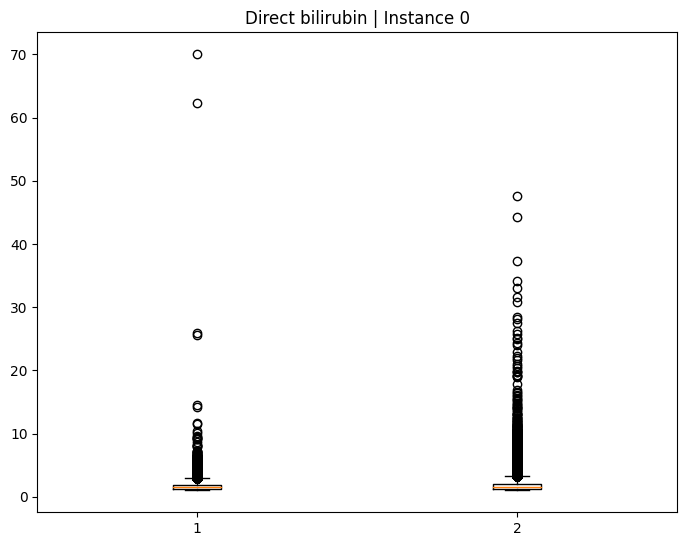

Gamma glutamyltransferase | Instance 0
(24869, 2) (444346, 2)
TtestResult(statistic=array([        inf, -2.03612553]), pvalue=array([0.        , 0.04173831]), df=array([469213., 469213.]))


c:\users\keimp\appdata\local\programs\python\python39\lib\site-packages\scipy\stats\_axis_nan_policy.py:551: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, axis=axis, **kwds)


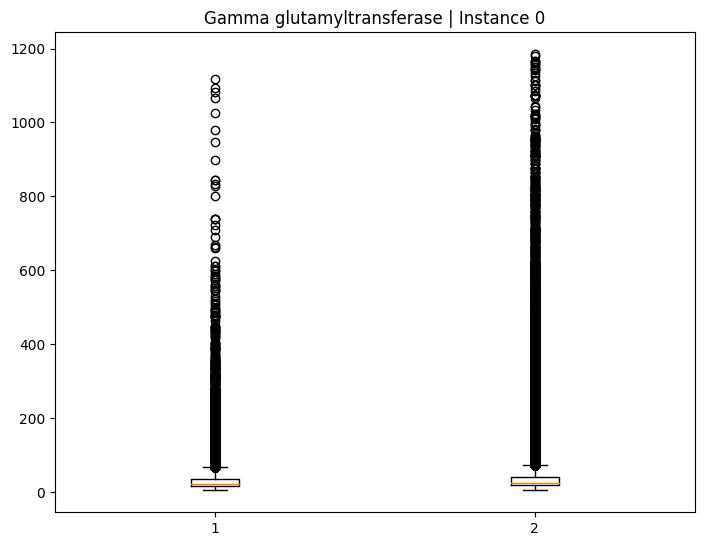

IGF-1 | Instance 0
(24733, 2) (442182, 2)
TtestResult(statistic=array([         inf, -45.49685297]), pvalue=array([0., 0.]), df=array([466913., 466913.]))


c:\users\keimp\appdata\local\programs\python\python39\lib\site-packages\scipy\stats\_axis_nan_policy.py:551: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, axis=axis, **kwds)


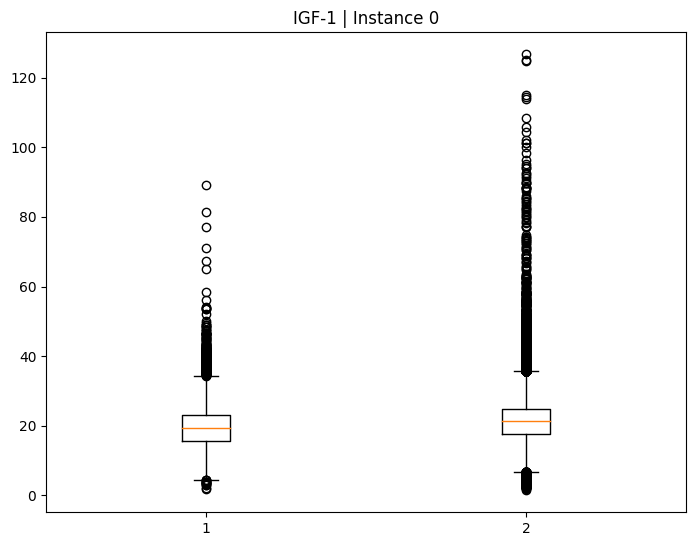

Lipoprotein A | Instance 0
(19903, 2) (355626, 2)
TtestResult(statistic=array([      inf, 1.5988242]), pvalue=array([0.        , 0.10986051]), df=array([375527., 375527.]))


c:\users\keimp\appdata\local\programs\python\python39\lib\site-packages\scipy\stats\_axis_nan_policy.py:551: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, axis=axis, **kwds)


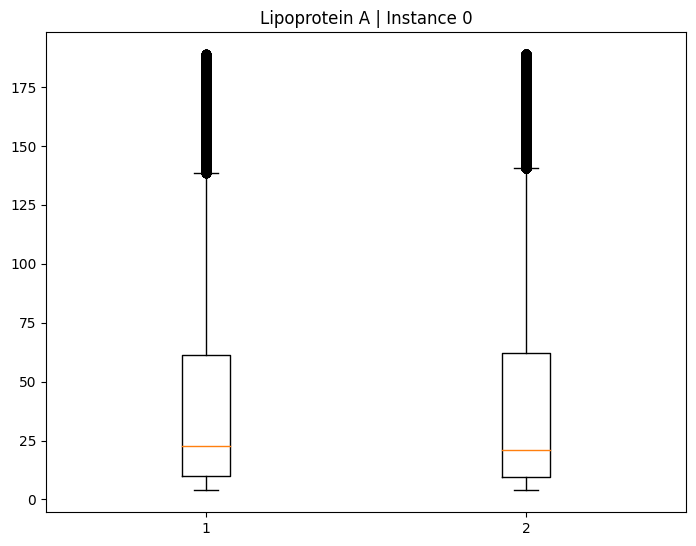

Rheumatoid factor | Instance 0
(2724, 2) (38580, 2)
TtestResult(statistic=array([       inf, 7.78189294]), pvalue=array([0.00000000e+00, 7.31025866e-15]), df=array([41302., 41302.]))


c:\users\keimp\appdata\local\programs\python\python39\lib\site-packages\scipy\stats\_axis_nan_policy.py:551: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, axis=axis, **kwds)


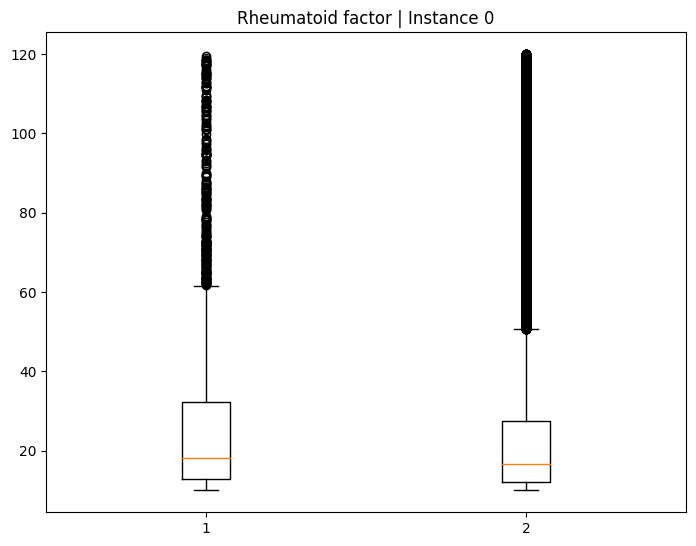

Phosphate | Instance 0
(22640, 2) (406496, 2)


c:\users\keimp\appdata\local\programs\python\python39\lib\site-packages\scipy\stats\_axis_nan_policy.py:551: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, axis=axis, **kwds)


TtestResult(statistic=array([        inf, 34.84972603]), pvalue=array([0.00000000e+000, 1.01489295e-265]), df=array([429134., 429134.]))


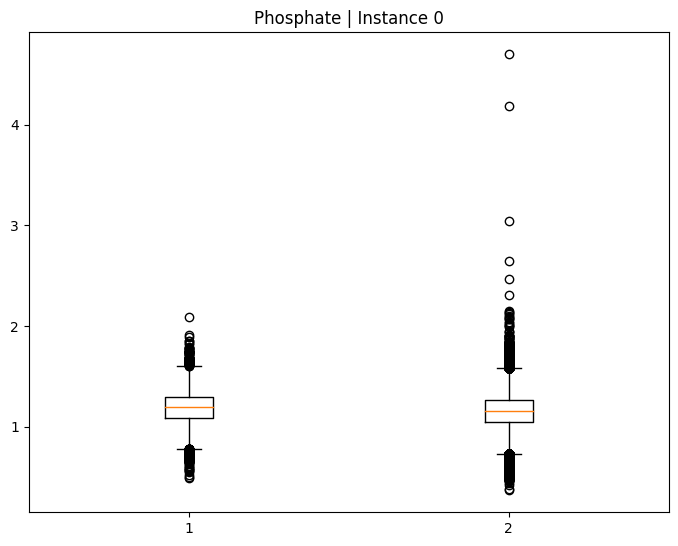

In [74]:
for i in c:
    print(i)
    t1 = df[["Date M81 first reported (osteoporosis without pathological fracture)_binary", i]]
    t1 = t1[t1["Date M81 first reported (osteoporosis without pathological fracture)_binary"] == 1].dropna()

    t2 = df[["Date M81 first reported (osteoporosis without pathological fracture)_binary", i]]
    t2 = t2[t2["Date M81 first reported (osteoporosis without pathological fracture)_binary"] == 0].dropna()

    print(t1.shape, t2.shape)
    print(stats.ttest_ind(t1, t2))
    
    boxplot_timseries([t1[i].tolist(), t2[i].tolist()], i )

### UM

In [75]:
df = df.merge(pd.read_csv("C:/Users/keimp/NHS/Data_files/Grouped_files/replace/Urine_biomarkers.csv"))

C:\Users\keimp\AppData\Roaming\Python\Python39\site-packages\IPython\core\interactiveshell.py:3139: DtypeWarning: Columns (3,11,15) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [76]:
c = [
    'Creatinine (enzymatic) in urine | Instance 0',
 'Microalbumin in urine | Instance 0',
 'Sodium in urine | Instance 0',
 'Potassium in urine | Instance 0',
]

Creatinine (enzymatic) in urine | Instance 0
(25688, 2) (458487, 2)
TtestResult(statistic=array([         inf, -47.35267993]), pvalue=array([0., 0.]), df=array([484173., 484173.]))


c:\users\keimp\appdata\local\programs\python\python39\lib\site-packages\scipy\stats\_axis_nan_policy.py:551: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, axis=axis, **kwds)


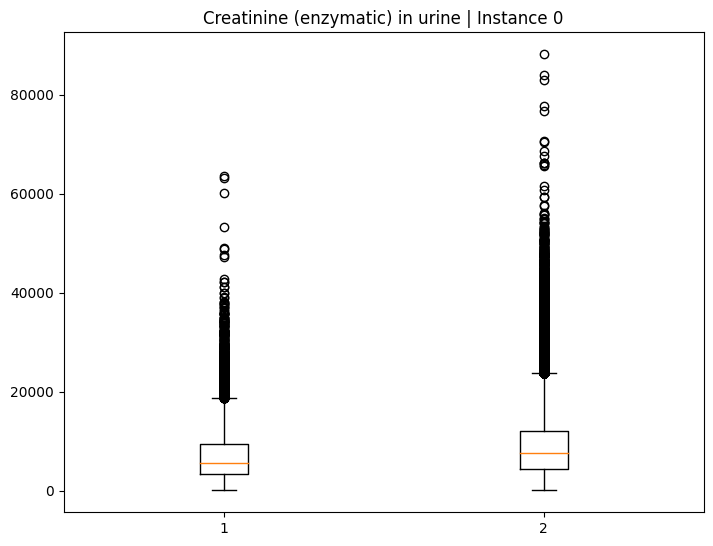

Microalbumin in urine | Instance 0
(8200, 2) (144659, 2)
TtestResult(statistic=array([       inf, 0.89842991]), pvalue=array([0.        , 0.36895781]), df=array([152857., 152857.]))


c:\users\keimp\appdata\local\programs\python\python39\lib\site-packages\scipy\stats\_axis_nan_policy.py:551: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, axis=axis, **kwds)


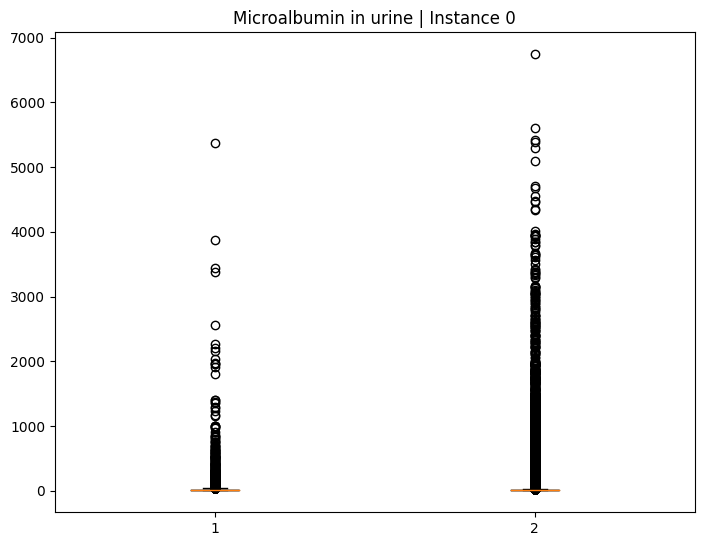

Sodium in urine | Instance 0
(25554, 2) (457589, 2)
TtestResult(statistic=array([         inf, -44.20299017]), pvalue=array([0., 0.]), df=array([483141., 483141.]))


c:\users\keimp\appdata\local\programs\python\python39\lib\site-packages\scipy\stats\_axis_nan_policy.py:551: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, axis=axis, **kwds)


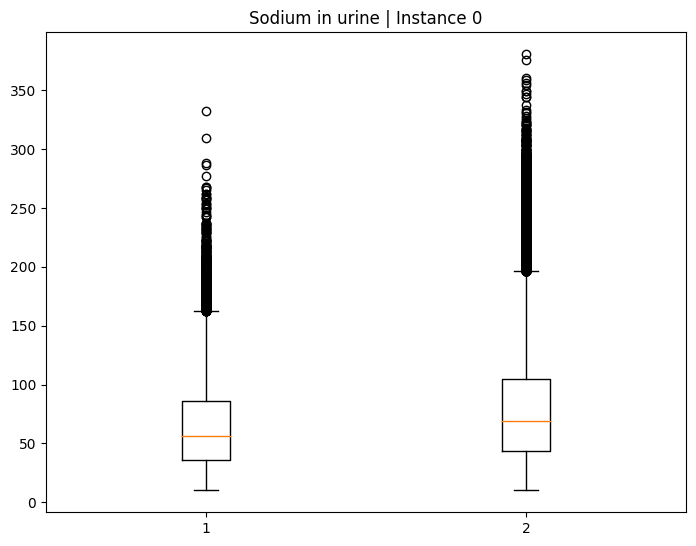

Potassium in urine | Instance 0
(25635, 2) (457519, 2)
TtestResult(statistic=array([         inf, -23.49057675]), pvalue=array([0.00000000e+000, 5.96311777e-122]), df=array([483152., 483152.]))


c:\users\keimp\appdata\local\programs\python\python39\lib\site-packages\scipy\stats\_axis_nan_policy.py:551: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, axis=axis, **kwds)


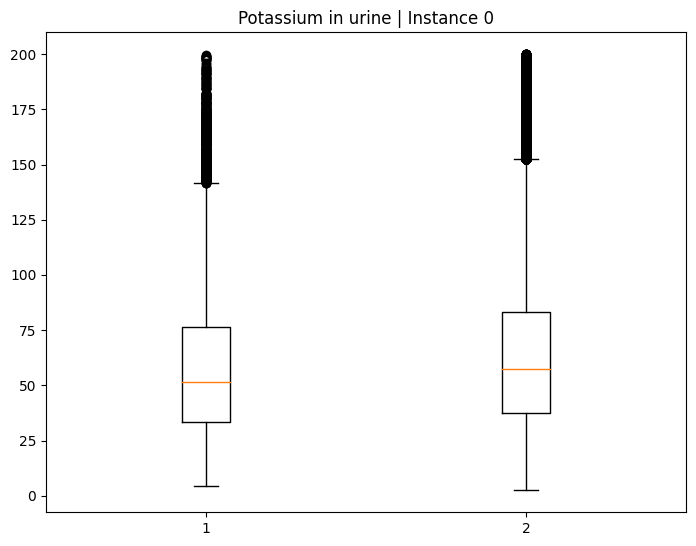

In [77]:
for i in c:
    print(i)
    t1 = df[["Date M81 first reported (osteoporosis without pathological fracture)_binary", i]]
    t1 = t1[t1["Date M81 first reported (osteoporosis without pathological fracture)_binary"] == 1].dropna()

    t2 = df[["Date M81 first reported (osteoporosis without pathological fracture)_binary", i]]
    t2 = t2[t2["Date M81 first reported (osteoporosis without pathological fracture)_binary"] == 0].dropna()

    print(t1.shape, t2.shape)
    print(stats.ttest_ind(t1, t2))
    
    boxplot_timseries([t1[i].tolist(), t2[i].tolist()], i )

### Demographics

In [78]:
df = df.merge(pd.read_csv("C:/Users/keimp/NHS/Data_files/Grouped_files/replace/Demographics.csv"))

In [79]:
df["Sex"] = df["Sex"].apply(dp.sex_to_binary)

In [80]:
t = df[df["Date M81 first reported (osteoporosis without pathological fracture)_binary"]==1]

([<matplotlib.axis.XTick at 0x228b4e41e80>,
 [Text(1, 0, 'Male'), Text(2, 0, 'Female')])

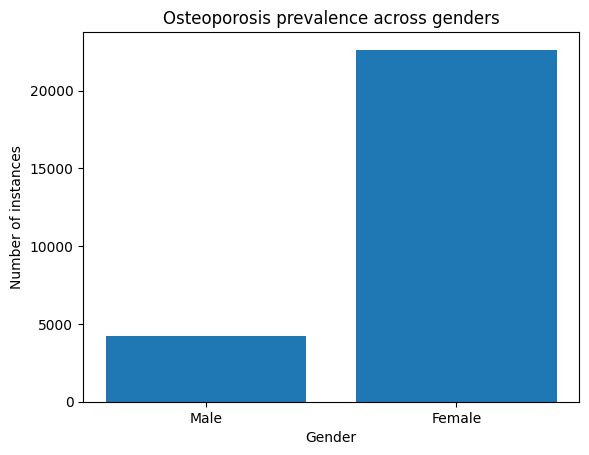

In [81]:
plt.bar([1,2], [len(t[t["Sex"]==1]),
               len(t[t["Sex"]==0])])
plt.title("Osteoporosis prevalence across genders")
plt.ylabel("Number of instances")
plt.xlabel("Gender")
plt.xticks([1,2], ["Male", "Female"])

In [54]:
df.columns.tolist()

['Participant ID',
 'Date M80 first reported (osteoporosis with pathological fracture)',
 'Date M81 first reported (osteoporosis without pathological fracture)',
 'Date M82 first reported (osteoporosis in diseases classified elsewhere)',
 'Haemoglobin concentration | Instance 0',
 'Haemoglobin concentration | Instance 1',
 'Haemoglobin concentration | Instance 2',
 'Albumin | Instance 0',
 'Albumin | Instance 1',
 'Creatinine | Instance 0',
 'Creatinine | Instance 1',
 'C-reactive protein | Instance 0',
 'C-reactive protein | Instance 1',
 'Cholesterol | Instance 0',
 'Cholesterol | Instance 1',
 'HDL cholesterol | Instance 0',
 'HDL cholesterol | Instance 1',
 'LDL direct | Instance 0',
 'LDL direct | Instance 1',
 'Glucose | Instance 0',
 'Glucose | Instance 1',
 'Triglycerides | Instance 0',
 'Triglycerides | Instance 1',
 'Vitamin D | Instance 0',
 'Vitamin D | Instance 1',
 'Glycated haemoglobin (HbA1c) | Instance 0',
 'Glycated haemoglobin (HbA1c) | Instance 1',
 'Glycated haemog